

### 점추정

- 정의: 추정하고 싶은 모평균 혹은 모분산이라는 모수를 하나의 수치로 측정

<br>

**모평균의 점추정**

- 무작위추출로 얻은 20개의 건물의 가구당 평균 방의 수 샘플은 각 샘플마다 기대값인 E(X) ,분산은 V(X)인 확률분포를 따르고, 서로 독립인 확률변수라고 할 수 있다.

- 이후 표변평균도 확률변수가  된다(시행할 때마다 얻는 결과값은 달라진다)

- 최종적으로 표본평균의 기대값은 모평균이된다.

- 이런식으로 추정량의 기대값이 추측하려는 모수가 되는 성질을 불편성(편향되지 않음)이다

- 불편추정량: 불편량을 가진 추정량

-  일치성: 표본크기를 증가시키면 추측하려는 모수에 수렴

- 표본평균은 불편성과 일치성 모두를 지닌 모수(모평균)의 좋은 추정량이다.

<br>

**모분산의 점추정**

- 표본분산은 n으로 나눈 것이고 불편분산은 n-1로 나눈 것이다.


- 표본분산은 표본평균과 동일하게 확률변수로 표현이 되므로 시행할 때마다 결과가 달라진다.

- 불편성 및 일치성을 가지는지 파악

- n-1은 자유도

   - 자유도: 자유롭게 값을 취할 수 있느 변수의 개수

   - 분산의 경우 만족해야하는 제약이 있기에 자유도가 n-1

   - 자유도를 나누면 불편성을 가지게 된다

- 불편분산은 불편성과 일치성을 만족하는 좋은 추정량이다.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

%precision 3
%matplotlib inline

In [ ]:
#파이싼 Scikit-learn 기반 기초 데이터 세팅(RM: 가구당 평균 방 수)
from sklearn.datasets import load_boston

boston_houseprice_data = load_boston()

df = pd.DataFrame(
    data = boston_houseprice_data.data,
    columns = boston_houseprice_data.feature_names
)
rooms = np.array(df['RM'])

In [4]:
p_mean = np.mean(rooms)
p_var = np.var(rooms)

p_mean, p_var

(6.285, 0.493)

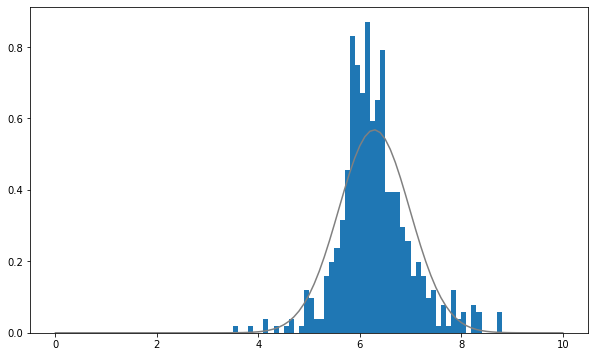

In [7]:
#기초데이터분포와 정규분포의 유사성 확인

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

xs = np.arange(101)/10
rv = stats.norm(p_mean, np.sqrt(p_var))
ax.plot(xs,rv.pdf(xs), color ='gray')
ax.hist(rooms, bins=100, range=(0,10), density=True)

plt.show()

In [8]:
np.random.seed(0)
n=20
sample = np.random.choice(rooms, n)
sample

array([5.572, 6.03 , 6.021, 7.178, 5.708, 6.438, 7.875, 6.112, 6.004,
       5.404, 6.826, 6.358, 6.63 , 6.121, 6.417, 6.437, 7.007, 6.405,
       6.567, 6.8  ])

In [10]:
np.random.seed(111)
n_samples=10000
samples = np.random.choice(rooms, (n_samples, n))

In [14]:
#모평균의 점추정 표본평균 및 표본평균의 기대값

for i in range(5):
    s_mean =np.mean(sample[i])
    print(f'{i+1}번째 표본평균: {s_mean:.3f}')

1번째 표본평균: 5.572
2번째 표본평균: 6.030
3번째 표본평균: 6.021
4번째 표본평균: 7.178
5번째 표본평균: 5.708


In [15]:
sample_means = np.mean(samples, axis=1)
np.mean(sample_means)

6.286

In [16]:
np.mean(np.random.choice(rooms, int(1e6)))

6.284

In [18]:
#모분산의 점추정 표본분산 및 표본분산의 기대값

for i in range(5):
    s_var = np.var(samples[i])
    print(f'{i+1}번째 표본분산: {s_var:.3f}')

1번째 표본분산: 0.589
2번째 표본분산: 0.360
3번째 표본분산: 0.486
4번째 표본분산: 0.360
5번째 표본분산: 0.319


In [19]:
sample_vars = np.var(samples, axis=1)
np.mean(sample_vars)

0.473

In [20]:
#var 함수에 delta degree of freedom=1을 지정하면 계산 가능

sample_u_vars = np.var(samples, axis=1, ddof=1)
np.mean(sample_u_vars)

0.498

In [21]:
#1,000,000개 샘플의 불편분산 계산시 모분산인 0.492과 거의 같아짐: 일정추정량 만족

np.var(np.random.choice(rooms, int(1e6)), ddof=1)

0.492